In [177]:
import pandas as pd
import numpy as np
#from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
#from PIL import Image
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [ ]:
path = '/datasets/'

In [84]:
sonar_df = pd.read_csv(path + '/sonar.csv', header=None)
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [85]:
sonar_df.shape

(208, 61)

In [86]:
# Присваиваем значения X и y
data = sonar_df.values
X = data[:,0:60].astype(float)
y = data[:,60]
y[y == 'R'] = '0'
y[y == 'M'] = '1'
y = y.astype(int)

print(f'Размерность X: {X.shape}, \nРазмерность Y: {y.shape}, \nTarget: {y}')

Размерность X: (208, 60), 
Размерность Y: (208,), 
Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [87]:
# Создаем обучающую и тестовую выборки и выводим их размерность
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(166, 60)
(42, 60)
(166,)
(42,)


Создаем нейронную сеть

In [212]:
 model = Sequential(
    [
     Dense(60, activation='relu'),
     Dropout(0.3),
     Dense(30, activation='relu'),
     Dropout(0.2),
     Dense(1, activation='sigmoid')
    ])

In [213]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [214]:
hist_sonar = model.fit(X_train, y_train, batch_size=4, epochs=200, validation_split=0.2)

Epoch 1/200
33/33 [==============================] - 1s 8ms/step - loss: 0.6897 - accuracy: 0.5423 - val_loss: 0.6898 - val_accuracy: 0.4706
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.4918 - val_loss: 0.6772 - val_accuracy: 0.5294
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5730 - val_loss: 0.6627 - val_accuracy: 0.6176
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.6133 - val_loss: 0.6485 - val_accuracy: 0.7941
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6260 - val_loss: 0.6426 - val_accuracy: 0.6765
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6260 - val_loss: 0.6175 - val_accuracy: 0.7647
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.7718 - val_loss: 0.6061 - val_accuracy: 0.7647
Epoch 8/200
3

In [215]:
# максимальная точность  и ошибка на обучающей и проверочной выборе
print(f'Максимальная точность обучающей выборки: {max(hist_sonar.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(hist_sonar.history["loss"])} \
\nМаксимальная точность проверочной выборки: {max(hist_sonar.history["val_accuracy"])} \
\nМинимальная ошибка на проверочной выборе: {min(hist_sonar.history["val_loss"])}')

Максимальная точность обучающей выборки: 1.0 
Минимальная ошибка на обучающей выборе: 0.005083885509520769 
Максимальная точность проверочной выборки: 0.8823529481887817 
Минимальная ошибка на проверочной выборе: 0.30125465989112854


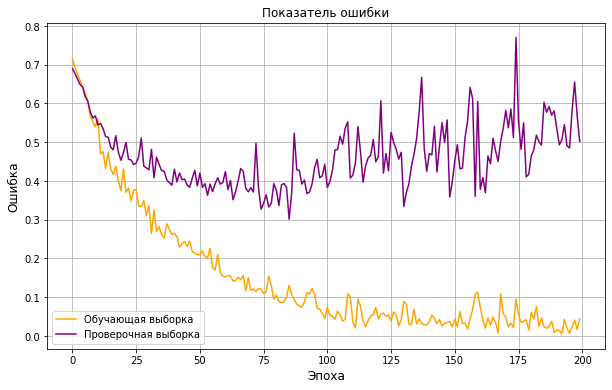

In [216]:
# график показатель ошибки для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(hist_sonar.history['loss'], color='orange', label='Обучающая выборка')
plt.plot(hist_sonar.history['val_loss'], color='purple', label='Проверочная выборка')
plt.title('Показатель ошибки')
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.legend()
plt.grid()
plt.show()

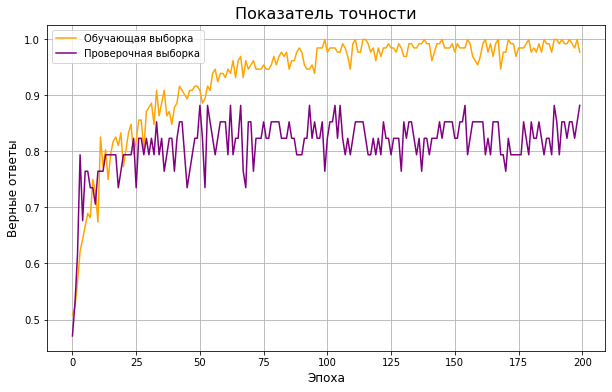

In [217]:
# # график показатель точности для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(hist_sonar.history['accuracy'], color='orange', label='Обучающая выборка')
plt.plot(hist_sonar.history['val_accuracy'], color='purple', label='Проверочная выборка')
plt.title('Показатель точности', fontsize=16)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Верные ответы', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [218]:
# Создаем тестовую выборку и выводим рамерность
X_train_check, X_test_check, y_train_check, y_test_check = train_test_split(X_train,
                                                           y_train, test_size=0.2)
print(X_train_check.shape)
print(X_test_check.shape)
print(y_train_check.shape)
print(y_test_check.shape)

(132, 60)
(34, 60)
(132,)
(34,)


In [219]:
# Создаем модель
model_2 = Sequential(
    [
     Dense(60, activation='relu'),
     Dropout(0.3),
     Dense(256, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
     Dense(64, activation='relu'),
     Dropout(0.3),
     Dense(32, activation='relu'),
     Dropout(0.2),
     Dense(1, activation='sigmoid')
    ])

In [220]:
model_2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [221]:
# Обучаем модель
hist_2_sonar = model_2.fit(X_train_check, y_train_check, batch_size=4, epochs=200, 
                         validation_data=(X_test_check, y_test_check))

Epoch 1/200
33/33 [==============================] - 1s 11ms/step - loss: 0.7116 - accuracy: 0.5198 - val_loss: 0.6897 - val_accuracy: 0.4706
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.5420 - val_loss: 0.6876 - val_accuracy: 0.4706
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7117 - accuracy: 0.4770 - val_loss: 0.6640 - val_accuracy: 0.4706
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.4650 - val_loss: 0.6405 - val_accuracy: 0.4412
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.5714 - val_loss: 0.5900 - val_accuracy: 0.7353
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6006 - accuracy: 0.6466 - val_loss: 0.5475 - val_accuracy: 0.6471
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.5992 - accuracy: 0.6717 - val_loss: 0.5001 - val_accuracy: 0.8529
Epoch 8/200


In [222]:
# максимадьная точность  и ошибка на тестовой выборе
print(f'Максимальная точность тестовой выборки: {max(hist_2_sonar.history["val_accuracy"])} \
\nМинимальная ошибка на тестовой выборе: {min(hist_2_sonar.history["val_loss"])} \
\nМаксимальная точность обучающей выборки: {max(hist_2_sonar.history["accuracy"])} \
\nМинимальная ошибка на обучающей выборе: {min(hist_2_sonar.history["loss"])}')

Максимальная точность тестовой выборки: 1.0 
Минимальная ошибка на тестовой выборе: 0.019493086263537407 
Максимальная точность обучающей выборки: 1.0 
Минимальная ошибка на обучающей выборе: 0.012294256128370762


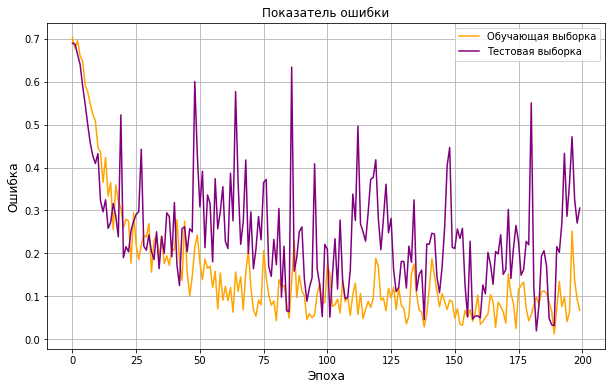

In [226]:
# график показатель ошибки для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(hist_2_sonar.history['loss'], color='orange', label='Обучающая выборка')
plt.plot(hist_2_sonar.history['val_loss'], color='purple', label='Тестовая выборка')
plt.title('Показатель ошибки')
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Ошибка', fontsize=12)
plt.legend()
plt.grid()
plt.show()

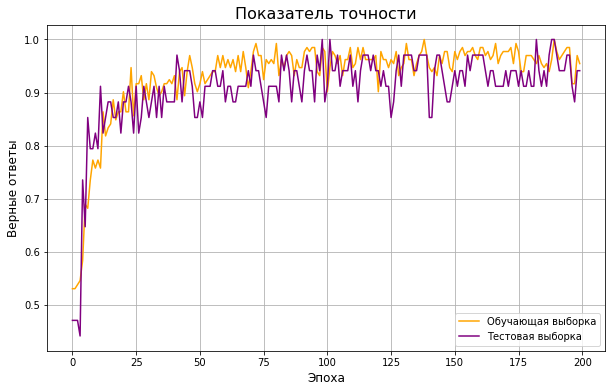

In [227]:
# # график показатель точности для каждой эпохи
plt.figure(figsize=(10, 6))
plt.plot(hist_2_sonar.history['accuracy'], color='orange', label='Обучающая выборка')
plt.plot(hist_2_sonar.history['val_accuracy'], color='purple', label='Тестовая выборка')
plt.title('Показатель точности', fontsize=16)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Верные ответы', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [223]:
# Проверочная выборка
scores = model.evaluate(X_test, y_test, verbose=1)
scores

2/2 [==============================] - 0s 5ms/step - loss: 0.8049 - accuracy: 0.8095


[0.8049222230911255, 0.8095238208770752]

In [225]:
# Тестовая выборка
accuracy = model_2.evaluate(X_test_check, y_test_check)
accuracy

2/2 [==============================] - 0s 7ms/step - loss: 0.3054 - accuracy: 0.9412


[0.30538180470466614, 0.9411764740943909]